In [18]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import re

In [19]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)

response.status_code

200

In [20]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' />\n<link rel="profile" href="https://gmpg.org/xfn/11" />\n<link rel="pingback" href="https://countrymusichalloffame.org/wp/xmlrpc.php" />\n<!--[if lt IE 9]>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-them

In [21]:
soup = BeautifulSoup(response.content, 'lxml')
print(soup.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [22]:
print(soup)

<!DOCTYPE html>
<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<link href="https://countrymusichalloffame.org/wp/xmlrpc.php" rel="pingback"/>
<!--[if lt IE 9]>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/respond.min.js"></script>
<![endif]-->
<title>Hall of Fam

In [23]:
names = soup.find_all('div', attrs = {'class': 'vertical-card_content--title'})

In [24]:
print(names)

[<div class="vertical-card_content--title">
<h3>Roy Acuff</h3>
</div>, <div class="vertical-card_content--title">
<h3>Alabama</h3>
</div>, <div class="vertical-card_content--title">
<h3>Bill Anderson</h3>
</div>, <div class="vertical-card_content--title">
<h3>Eddy Arnold</h3>
</div>, <div class="vertical-card_content--title">
<h3>Chet Atkins</h3>
</div>, <div class="vertical-card_content--title">
<h3>Gene Autry</h3>
</div>, <div class="vertical-card_content--title">
<h3>DeFord Bailey</h3>
</div>, <div class="vertical-card_content--title">
<h3>Bobby Bare</h3>
</div>, <div class="vertical-card_content--title">
<h3>Johnny Bond</h3>
</div>]


In [9]:
print(type(names))

<class 'bs4.element.ResultSet'>


In [25]:
#cleaning name data courtesy of Brenda G
artists = []
for i in range(len(names)):
    name = names[i].get_text().replace("\n", "")
    artists.append(name)
print(artists)
type(names)

['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


bs4.element.ResultSet

In [32]:
years = soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
type(years)

bs4.element.ResultSet

In [34]:
inducted_year = []
for i in range(len(years)):
    year = years[i].get_text().replace("\n", "").replace("Inducted ", "").strip()
    inducted_year.append(year)
print(inducted_year)
type(inducted_year)

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']


list

figured this out myself:

In [40]:
combined = pd.DataFrame({'artists':artists,'year inducted':inducted_year})
combined

,artists,year inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


In [13]:
#trying different ways to get the years

inducted_years = soup.find_all('div', attrs = {'class': 'vertical-card_content--copy'})

In [16]:
#Dipen gave me this but I haven't been able to get it to work.

In [17]:

year =[]
for x in inducted_years:
    year.append(x.strip().replace('Inducted ',""))
year


TypeError: 'NoneType' object is not callable

In [41]:
#test to try second page
website_url2 = 'https://countrymusichalloffame.org/hall-of-fame/members/page/2'
response2 = requests.get(website_url2)

response2.status_code

200

In [ ]:
#yep!

In [ ]:
#looping through all pages

In [86]:

URL = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'

all_artists = []
all_years = []

for page in range(1,17):
    w_url = URL + str(page)
    print(w_url)
    req = requests.get(w_url)
    soup_loop = BeautifulSoup(req.content, 'lxml')
   
    vcard_t = soup_loop.find_all('div', attrs = {'class': 'vertical-card_content--title'})
    vcard_c = soup_loop.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
#     print(vcard_t)
#     print(vcard_c)
    for i in range(len(vcard_t)):
        name = vcard_t[i].get_text().replace("\n", "")
        all_artists.append(name)
        
    for i in range(len(vcard_c)):
        year = vcard_c[i].get_text().replace("\n", "").replace("Inducted ", "").strip()
        all_years.append(year)
#         print(year)
print(all_artists)    
print(all_years)


https://countrymusichalloffame.org/hall-of-fame/members/page/1
https://countrymusichalloffame.org/hall-of-fame/members/page/2
https://countrymusichalloffame.org/hall-of-fame/members/page/3
https://countrymusichalloffame.org/hall-of-fame/members/page/4
https://countrymusichalloffame.org/hall-of-fame/members/page/5
https://countrymusichalloffame.org/hall-of-fame/members/page/6
https://countrymusichalloffame.org/hall-of-fame/members/page/7
https://countrymusichalloffame.org/hall-of-fame/members/page/8
https://countrymusichalloffame.org/hall-of-fame/members/page/9
https://countrymusichalloffame.org/hall-of-fame/members/page/10
https://countrymusichalloffame.org/hall-of-fame/members/page/11
https://countrymusichalloffame.org/hall-of-fame/members/page/12
https://countrymusichalloffame.org/hall-of-fame/members/page/13
https://countrymusichalloffame.org/hall-of-fame/members/page/14
https://countrymusichalloffame.org/hall-of-fame/members/page/15
https://countrymusichalloffame.org/hall-of-fame/m

In [106]:
combine_all = pd.DataFrame({'artists':all_artists,'year_inducted':all_years})
combine_all

,artists,year_inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
135,Hank Williams,1961
136,Bob Wills,1968
137,Mac Wiseman,2014
138,Tammy Wynette,1998


In [95]:
combine_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   artists        140 non-null    object
 1   year inducted  140 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [108]:
combine_all['year_inducted']= combine_all.year_inducted.astype(int)
combine_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   artists        140 non-null    object
 1   year_inducted  140 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 1.8+ KB


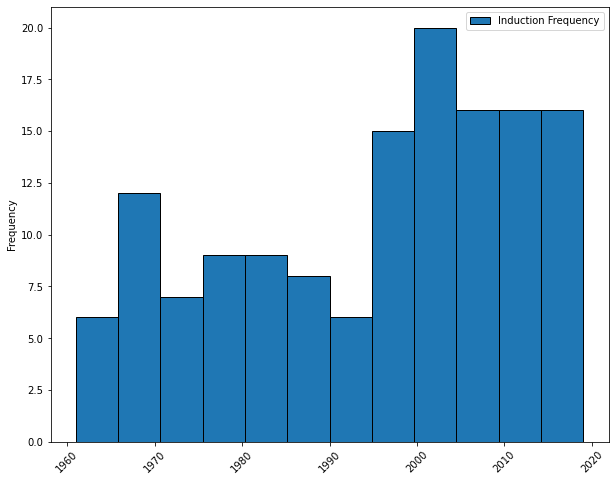

In [122]:
import matplotlib.pyplot as plt
combine_all.plot.hist(bins=12, alpha = 1, ec = 'black', figsize=(10,8))
plt.xticks(label = 'Years',rotation=45)
plt.legend(['Induction Frequency']);